In [1]:
import heeps
import photutils
import numpy as np
import matplotlib.pyplot as plt

# center between pixels

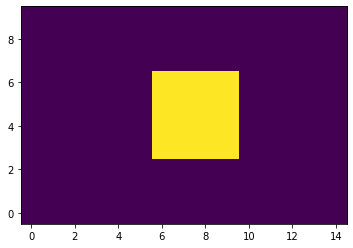

In [2]:
nx, ny = 15, 10
cx, cy = 7.5, 4.5
r = 2
img = np.zeros((ny, nx))
img[int(cy-r+.5):int(cy+r+.5),int(cx-r+.5):int(cx+r+.5)] = 1
plt.imshow(img, origin='lower');

In [3]:
aper = photutils.CircularAperture((cx, cy), r*np.sqrt(2))
flux = photutils.aperture_photometry(img, aper, method='exact')
print(flux)
print('expected:', 4*r**2)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1     7.5     4.5         16.0
expected: 16


In [4]:
aper = photutils.CircularAperture((cx, cy), r)
flux = photutils.aperture_photometry(img, aper, method='exact')
print(flux)
print('expected:', np.pi*r**2)

 id xcenter ycenter    aperture_sum   
      pix     pix                     
--- ------- ------- ------------------
  1     7.5     4.5 12.566370614359172
expected: 12.566370614359172


# center on a pixel

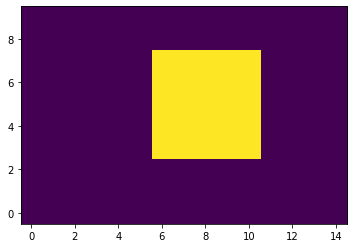

In [5]:
nx, ny = 15, 10
cx, cy = 8, 5
r = 2.5
img = np.zeros((ny, nx))
img[int(cy-r+.5):int(cy+r+.5),int(cx-r+.5):int(cx+r+.5)] = 1
plt.imshow(img, origin='lower');

In [6]:
aper = photutils.CircularAperture((cx, cy), r*np.sqrt(2))
flux = photutils.aperture_photometry(img, aper, method='exact')
print(flux)
print('expected:', 4*r**2)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1     8.0     5.0         25.0
expected: 25.0


In [7]:
aper = photutils.CircularAperture((cx, cy), r)
flux = photutils.aperture_photometry(img, aper, method='exact')
print(flux)
print('expected:', np.pi*r**2)

 id xcenter ycenter    aperture_sum   
      pix     pix                     
--- ------- ------- ------------------
  1     8.0     5.0 19.634954084936208
expected: 19.634954084936208


# HEEPS PSF

Simulation config: band=L, mode=CVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, diam_norm=1.0838, beam_ratio=0.2568
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)



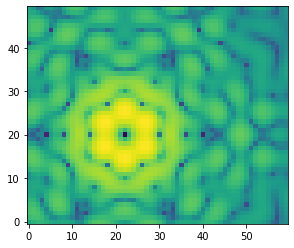

In [8]:
conf = heeps.config.read_config(**dict(mode='CVC', f_pupil='pupil/ELT_fullM1.fits'))
conf = heeps.config.update_config(verbose=True, **conf)
wf = heeps.pupil.pupil(**conf)
psf = heeps.wavefront.propagate_one(wf, **conf)
ndet = psf.shape[0]
cdet = ndet // 2
cx, cy = 22, 20
radius = 16
img = psf[cdet-cy:cdet+cy+10,cdet-cx:cdet+cx+16]
ny, nx = img.shape
plt.imshow(np.log10(img), origin='lower');

In [9]:
# slightly increase cx and cy to make the center a float value
cx += .2
cy += .2
print('nx, ny, cx, cy = %s, %s, %s, %s'%(nx, ny, cx, cy))

nx, ny, cx, cy = 60, 50, 22.2, 20.2


Sxy = 6.7438e-03
[Ix, Iy] = [-1.7892e-04, -9.8032e-05]


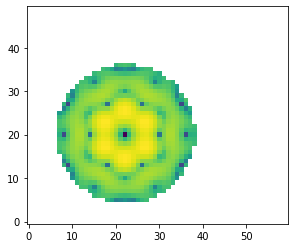

In [10]:
x, y = np.meshgrid(np.arange(nx)-cx, np.arange(ny)-cy)
r = np.abs(x + 1j*y)
img_mask = img*(r <= radius)
np.seterr(divide = 'ignore') 
plt.imshow(np.log10(img_mask), origin='lower');
Sxy = np.sum(img_mask)
print('Sxy = %.4e'%Sxy)
Sx = np.cumsum(np.sum(img_mask, axis=0))
Sy = np.cumsum(np.sum(img_mask, axis=1))
Ix = Sxy - 2*np.interp(cx, np.arange(nx)+.5, Sx)
Iy = Sxy - 2*np.interp(cy, np.arange(ny)+.5, Sy)
print('[Ix, Iy] = [%.4e, %.4e]'%(Ix, Iy))

In [11]:
aper = photutils.CircularAperture((cx, cy), radius)
Sxy = photutils.aperture_photometry(img, aper, method='exact')['aperture_sum'][0]
print('Sxy = %.4e'%Sxy)
y, x = np.indices((ny,nx))
cx1 = np.floor(cx)-1
cy1 = np.floor(cy)-1
x_flux1 = photutils.aperture_photometry(img*(x<=cx1), aper, method='exact')['aperture_sum'][0]
x_flux2 = photutils.aperture_photometry(img*(x<=(cx1+1)), aper, method='exact')['aperture_sum'][0]
x_flux3 = photutils.aperture_photometry(img, aper, method='exact')['aperture_sum'][0]
Sx = [x_flux1, x_flux2, x_flux3]
y_flux1 = photutils.aperture_photometry(img*(y<=cy1), aper, method='exact')['aperture_sum'][0]
y_flux2 = photutils.aperture_photometry(img*(y<=(cy1+1)), aper, method='exact')['aperture_sum'][0]
y_flux3 = photutils.aperture_photometry(img, aper, method='exact')['aperture_sum'][0]
Sy = [y_flux1, y_flux2, y_flux3]
Ix = Sxy - 2*np.interp(cx, [cx1+.5, cx1+1.5, nx], Sx)
Iy = Sxy - 2*np.interp(cy, [cy1+.5, cy1+1.5, ny], Sy)
print('[Ix, Iy] = [%.4e, %.4e]'%(Ix, Iy))

Sxy = 6.7435e-03
[Ix, Iy] = [-1.7991e-04, -9.9508e-05]
